# ***HƯỚNG DẪN CODE BÀI TẬP VỀ NHÀ DAY 7***

ĐÂY LÀ BÀI TẬP CODE MODEL LOGISTIC REGRESSION.

GỒM PHẦN CODE CUNG CẤP SẴN VÀ CODE CÁC BẠN PHẢI HOÀN THÀNH.

CHẠY LẦN LƯỢT TỪNG CODE BLOCK.

KẾT QUẢ TRAIN COPY VÀO FILE PDF.

NỘP BÀI TRÊN LINK GGFORM LÀ NỘP FILE KẾT QUẢ TRAIN PDF VÀ FILE du_lieu_logistic_regression.csv ĐƯỢC XUẤT RA SAU KHI CHẠY TOÀN BỘ CÁC BLOCK.

GIỮ NGUYÊN TÊN FILE du_lieu_logistic_regression.csv. FILE KẾT QUẢ ĐỔI TÊN BẰNG CÚ PHÁP "HỌ VÀ TÊN - MSSS (NẾU LÀ HỌC SINH THÌ GHI "HS")"

In [ ]:
"""
ĐÂY LÀ PHẦN CODE ĐƯỢC CUNG CẤP SẴN (VUI LÒNG KHÔNG CHỈNH SỬA PHẦN NÀY)
VUI LÒNG RUN CODE BLOCK NÀY TRƯỚC KHI RUN CODE MODEL
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

# Thiết lập font để hiển thị tiếng Việt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('seaborn-v0_8')

print("=" * 60)
print("BÀI TẬP: LOGISTIC REGRESSION VỚI DỮ LIỆU NHIỄU VÀ ĐA CỘNG TUYẾN")
print("=" * 60)

BÀI TẬP: LOGISTIC REGRESSION VỚI DỮ LIỆU NHIỄU VÀ ĐA CỘNG TUYẾN


In [ ]:
"""
ĐÂY LÀ PHẦN CODE ĐƯỢC CUNG CẤP SẴN (VUI LÒNG KHÔNG CHỈNH SỬA PHẦN NÀY)
VUI LÒNG RUN CODE BLOCK NÀY TRƯỚC KHI RUN CODE MODEL
"""
# =============================================================================
# PHẦN 1: TẠO DỮ LIỆU VỚI NHIỄU VÀ ĐA CỘNG TUYẾN (CHO SẴN)
# =============================================================================

np.random.seed(42)
n_samples = 1000

# Tạo các biến độc lập gốc
x1 = np.random.normal(50, 15, n_samples)  # Tuổi
x2 = np.random.normal(60000, 20000, n_samples)  # Thu nhập
x3 = np.random.normal(3, 1.5, n_samples)  # Số năm kinh nghiệm

# Tạo đa cộng tuyến
x4 = 0.8 * x1 + 10 + np.random.normal(0, 5, n_samples)  # Tuổi nghề (tương quan cao với tuổi)
x5 = 0.7 * x2 + 0.3 * x3 * 5000 + np.random.normal(0, 3000, n_samples)  # Mức lương mong muốn
x6 = 1.2 * x1 - 0.5 * x4 + np.random.normal(0, 8, n_samples)  # Biến nhiễu cao

# Thêm nhiễu ngẫu nhiên
x7 = np.random.normal(0, 1, n_samples)  # Nhiễu thuần túy
x8 = np.random.uniform(-1, 1, n_samples)  # Nhiễu đều

# Tạo biến phụ thuộc (0: không được tuyển, 1: được tuyển)
linear_combination = (
    -3 +
    0.02 * x1 +  # Tuổi
    0.00003 * x2 +  # Thu nhập
    0.5 * x3 +  # Kinh nghiệm
    -0.01 * x4 +  # Tuổi nghề
    0.00001 * x5 +  # Mức lương mong muốn
    0.02 * x6 +  # Biến nhiễu
    0.1 * x7 +  # Nhiễu 1
    0.05 * x8   # Nhiễu 2
)

# Chuyển thành xác suất và nhãn
probabilities = 1 / (1 + np.exp(-linear_combination))
y = np.random.binomial(1, probabilities, n_samples)

# Tạo DataFrame
data = pd.DataFrame({
    'tuoi': x1,
    'thu_nhap': x2,
    'kinh_nghiem': x3,
    'tuoi_nghe': x4,
    'luong_mong_muon': x5,
    'bien_nhieu_1': x6,
    'nhieu_random': x7,
    'nhieu_uniform': x8,
    'duoc_tuyen': y
})

print("\n📊 THÔNG TIN DỮ LIỆU:")
print(f"- Số mẫu: {len(data)}")
print(f"- Số biến: {len(data.columns) - 1}")
print(f"- Tỷ lệ được tuyển: {y.mean():.1%}")

print("\n📈 THỐNG KÊ MÔ TẢ:")
print(data.describe().round(2))


📊 THÔNG TIN DỮ LIỆU:
- Số mẫu: 1000
- Số biến: 8
- Tỷ lệ được tuyển: 83.3%

📈 THỐNG KÊ MÔ TẢ:
          tuoi   thu_nhap  kinh_nghiem  tuoi_nghe  luong_mong_muon  \
count  1000.00    1000.00      1000.00    1000.00          1000.00   
mean     50.29   61416.72         3.01      50.14         47357.01   
std      14.69   19949.09         1.48      12.76         14387.21   
min       1.38    1192.23        -1.53       6.58          1586.30   
25%      40.29   47875.17         2.03      41.31         38258.69   
50%      50.38   61261.54         3.00      49.69         47239.98   
75%      59.72   74577.64         3.99      58.77         56907.58   
max     107.79  123862.15         8.89      98.49         93076.50   

       bien_nhieu_1  nhieu_random  nhieu_uniform  duoc_tuyen  
count       1000.00       1000.00        1000.00     1000.00  
mean          34.90         -0.03          -0.00        0.83  
std           14.42          1.03           0.56        0.37  
min          -11.80   

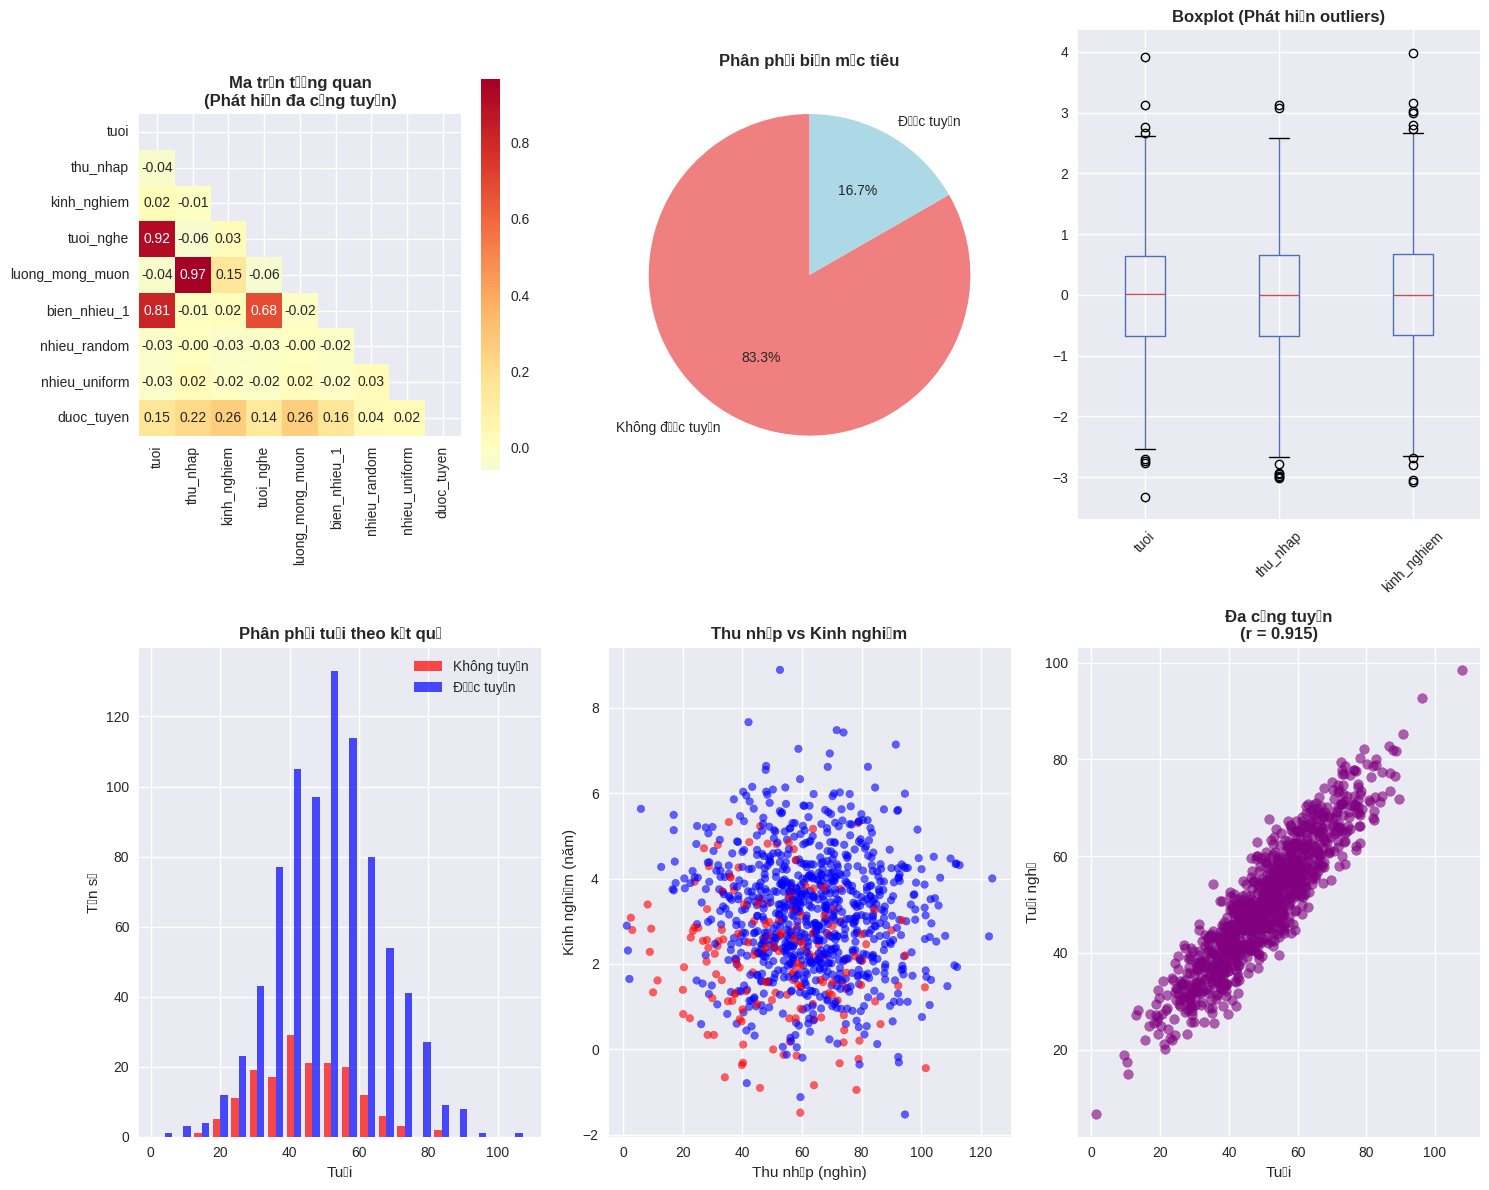

In [ ]:
"""
ĐÂY LÀ PHẦN CODE ĐƯỢC CUNG CẤP SẴN (VUI LÒNG KHÔNG CHỈNH SỬA PHẦN NÀY)
CODE NÀY GIÚP TRỰC QUAN HÓA DỮ LIỆU ĐỂ HIỂU SÂU HƠN VỀ DATA, BẠN CÓ THỂ RUN HOẶC KHÔNG
"""
# =============================================================================
# PHẦN 2: TRỰC QUAN HÓA DỮ LIỆU (CHO SẴN)
# =============================================================================

plt.figure(figsize=(15, 12))

# Ma trận tương quan
plt.subplot(2, 3, 1)
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            mask=mask,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Ma trận tương quan\n(Phát hiện đa cộng tuyến)', fontsize=12, fontweight='bold')

# Phân phối biến mục tiêu
plt.subplot(2, 3, 2)
counts = data['duoc_tuyen'].value_counts()
plt.pie(counts.values, labels=['Không được tuyển', 'Được tuyển'],
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Phân phối biến mục tiêu', fontsize=12, fontweight='bold')

# Boxplot để phát hiện nhiễu
plt.subplot(2, 3, 3)
numeric_cols = ['tuoi', 'thu_nhap', 'kinh_nghiem']
data_scaled = data[numeric_cols].copy()
for col in numeric_cols:
    data_scaled[col] = (data[col] - data[col].mean()) / data[col].std()

data_scaled.boxplot()
plt.title('Boxplot (Phát hiện outliers)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Histogram các biến chính
plt.subplot(2, 3, 4)
plt.hist([data[data['duoc_tuyen']==0]['tuoi'],
          data[data['duoc_tuyen']==1]['tuoi']],
         bins=20, alpha=0.7, label=['Không tuyển', 'Được tuyển'],
         color=['red', 'blue'])
plt.xlabel('Tuổi')
plt.ylabel('Tần số')
plt.title('Phân phối tuổi theo kết quả', fontsize=12, fontweight='bold')
plt.legend()

# Scatter plot thu nhập vs kinh nghiệm
plt.subplot(2, 3, 5)
colors = ['red' if x == 0 else 'blue' for x in data['duoc_tuyen']]
plt.scatter(data['thu_nhap']/1000, data['kinh_nghiem'],
           c=colors, alpha=0.6, s=30)
plt.xlabel('Thu nhập (nghìn)')
plt.ylabel('Kinh nghiệm (năm)')
plt.title('Thu nhập vs Kinh nghiệm', fontsize=12, fontweight='bold')

# Biểu đồ đa cộng tuyến
plt.subplot(2, 3, 6)
plt.scatter(data['tuoi'], data['tuoi_nghe'], alpha=0.6, color='purple')
plt.xlabel('Tuổi')
plt.ylabel('Tuổi nghề')
plt.title(f'Đa cộng tuyến\n(r = {data["tuoi"].corr(data["tuoi_nghe"]):.3f})',
          fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
"""
ĐÂY LÀ PHẦN CODE ĐƯỢC CUNG CẤP SẴN (VUI LÒNG KHÔNG CHỈNH SỬA PHẦN NÀY)
VUI LÒNG RUN CODE BLOCK NÀY TRƯỚC KHI RUN CODE MODEL
"""
# =============================================================================
# PHẦN 3: PHÂN TÍCH ĐA CỘNG TUYẾN (CHO SẴN)
# =============================================================================

print("\n🔍 PHÂN TÍCH ĐA CỘNG TUYẾN:")

# Tính VIF (Variance Inflation Factor)
def calculate_vif(df, features):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Biến"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i)
                       for i in range(len(features))]
    return vif_data

features = ['tuoi', 'thu_nhap', 'kinh_nghiem', 'tuoi_nghe', 'luong_mong_muon']
try:
    vif_df = calculate_vif(data, features)
    print("\nVIF (Variance Inflation Factor):")
    print("VIF > 5: Có đa cộng tuyến")
    print("VIF > 10: Đa cộng tuyến nghiêm trọng")
    print("-" * 30)
    for _, row in vif_df.iterrows():
        status = "⚠️ Cao" if row['VIF'] > 5 else "✅ Thấp"
        print(f"{row['Biến']:15}: {row['VIF']:6.2f} {status}")
except:
    print("Không thể tính VIF (cần cài đặt statsmodels)")

# Ma trận tương quan cao
print("\n📊 CÁC CẶP BIẾN CÓ TƯƠNG QUAN CAO:")
corr_matrix = data[features].corr()
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = abs(corr_matrix.iloc[i, j])
        if corr_val > 0.7:
            high_corr.append((corr_matrix.columns[i],
                            corr_matrix.columns[j],
                            corr_val))

for var1, var2, corr in high_corr:
    print(f"- {var1} ↔ {var2}: {corr:.3f}")


🔍 PHÂN TÍCH ĐA CỘNG TUYẾN:

VIF (Variance Inflation Factor):
VIF > 5: Có đa cộng tuyến
VIF > 10: Đa cộng tuyến nghiêm trọng
------------------------------
tuoi           :  78.12 ⚠️ Cao
thu_nhap       : 236.51 ⚠️ Cao
kinh_nghiem    :   7.70 ⚠️ Cao
tuoi_nghe      :  87.55 ⚠️ Cao
luong_mong_muon: 277.47 ⚠️ Cao

📊 CÁC CẶP BIẾN CÓ TƯƠNG QUAN CAO:
- tuoi ↔ tuoi_nghe: 0.915
- thu_nhap ↔ luong_mong_muon: 0.965


# **PHẦN DƯỚI ĐÂY LÀ CODE BẠN CẦN HIỆN THỰC**

In [ ]:
# =============================================================================
# CÂU HỎI 1: CHUẨN BỊ DỮ LIỆU VÀ CHIA TRAIN/TEST (5 điểm)
# =============================================================================
print("\n🎯 CÂU HỎI 1: CHUẨN BỊ DỮ LIỆU VÀ CHIA TRAIN/TEST")
print("Hướng dẫn:")
print("- Tách biến độc lập X và biến phụ thuộc y từ DataFrame 'data'")
print("- Chia dữ liệu thành tập train và test với tỷ lệ 80:20")
print("- Chuẩn hóa dữ liệu sử dụng StandardScaler")

# TODO: Viết code ở đây

X = data.drop('duoc_tuyen',axis=1)
y=data['duoc_tuyen']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

"""
Gợi ý:
- X = data.drop('duoc_tuyen', axis=1)
- y = data['duoc_tuyen']
- Sử dụng train_test_split với test_size=0.2, random_state=42, stratify=y
- Khởi tạo StandardScaler và fit_transform trên train, transform trên test
"""
_ = None


🎯 CÂU HỎI 1: CHUẨN BỊ DỮ LIỆU VÀ CHIA TRAIN/TEST
Hướng dẫn:
- Tách biến độc lập X và biến phụ thuộc y từ DataFrame 'data'
- Chia dữ liệu thành tập train và test với tỷ lệ 80:20
- Chuẩn hóa dữ liệu sử dụng StandardScaler


In [ ]:
# =============================================================================
# CÂU HỎI 2: XÂY DỰNG MÔ HÌNH LOGISTIC REGRESSION VỚI TẤT CẢ BIẾN (5 điểm)
# =============================================================================
print("\n🎯 CÂU HỎI 2: XÂY DỰNG MÔ HÌNH VỚI TẤT CẢ BIẾN")
print("Hướng dẫn:")
print("- Khởi tạo mô hình LogisticRegression")
print("- Huấn luyện trên dữ liệu train đã chuẩn hóa")
print("- Dự đoán trên tập test và tính xác suất")
print("- In ra độ chính xác của mô hình")

# TODO: Viết code ở đây

log_model_all = LogisticRegression(random_state=42, max_iter=1000)
log_model_all.fit(X_train_scaled,y_train)
y_pred_all = log_model_all.predict(X_test_scaled)
y_pred_proba_all = log_model_all.predict_proba(X_test_scaled)[:,1]

accuracy_all = accuracy_score(y_test,y_pred_all)
print(f'Accuracy: {accuracy_all}')
"""
Gợi ý:
- model_all = LogisticRegression(random_state=42, max_iter=1000)
- model_all.fit(X_train_scaled, y_train)
- y_pred_all = model_all.predict(X_test_scaled)
- y_pred_proba_all = model_all.predict_proba(X_test_scaled)[:, 1]
"""
_ = None


🎯 CÂU HỎI 2: XÂY DỰNG MÔ HÌNH VỚI TẤT CẢ BIẾN
Hướng dẫn:
- Khởi tạo mô hình LogisticRegression
- Huấn luyện trên dữ liệu train đã chuẩn hóa
- Dự đoán trên tập test và tính xác suất
- In ra độ chính xác của mô hình
Accuracy: 0.83


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# =============================================================================
# CÂU HỎI 3: LỰA CHỌN BIẾN QUAN TRỌNG VỚI RFE (5 điểm)
# =============================================================================
print("\n🎯 CÂU HỎI 3: LỰA CHỌN BIẾN QUAN TRỌNG VỚI RFE")
print("Hướng dẫn:")
print("- Sử dụng RFE để chọn 5 biến quan trọng nhất")
print("- Huấn luyện mô hình mới với các biến được chọn")
print("- So sánh độ chính xác với mô hình trước")

# TODO: Viết code ở đây

rfe = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train_scaled,y_train)
X_test_selected = rfe.transform(X_test_scaled)

log_model_rfe = LogisticRegression(random_state=42, max_iter=1000,penalty='l1', solver='liblinear')
log_model_rfe.fit(X_train_selected,y_train)
y_pred_rfe = log_model_rfe.predict(X_test_selected)
y_pred_proba_rfe = log_model_rfe.predict_proba(X_test_selected)[:,1]

accuracy_rfe = accuracy_score(y_test,y_pred_rfe)
print(f'Accuracy: {accuracy_rfe}')
"""
Gợi ý:
- rfe = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=5)
- X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
- X_test_selected = rfe.transform(X_test_scaled)
- Huấn luyện model_selected và dự đoán
"""
_ = None


🎯 CÂU HỎI 3: LỰA CHỌN BIẾN QUAN TRỌNG VỚI RFE
Hướng dẫn:
- Sử dụng RFE để chọn 5 biến quan trọng nhất
- Huấn luyện mô hình mới với các biến được chọn
- So sánh độ chính xác với mô hình trước
Accuracy: 0.83


In [ ]:
# =============================================================================
# MỞ RỘNG: Cross-validation và Feature selection
# =============================================================================
from sklearn.model_selection import cross_val_score

scores_all = cross_val_score(log_model_all, X_train_scaled, y_train, cv=5)
scores_rfe = cross_val_score(log_model_rfe, X_train_selected, y_train, cv=5)

print("Cross-val accuracy (All):", scores_all.mean())
print("Cross-val accuracy (RFE):", scores_rfe.mean())

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_train_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector.transform(X_test_scaled)

log_model_kbest = LogisticRegression(random_state=42, max_iter=1000)
log_model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = log_model_kbest.predict(X_test_kbest)
print("Accuracy (SelectKBest):", accuracy_score(y_test, y_pred_kbest))

Cross-val accuracy (All): 0.8400000000000001
Cross-val accuracy (RFE): 0.8387499999999999
Accuracy (SelectKBest): 0.83



🎯 CÂU HỎI 4: TRỰC QUAN HÓA HỆ SỐ VÀ MA TRẬN NHẦM LẪN
Hướng dẫn:
- Vẽ biểu đồ hệ số của mô hình (coefficients)
- Tạo và hiển thị ma trận nhầm lẫn
- Sử dụng matplotlib và seaborn


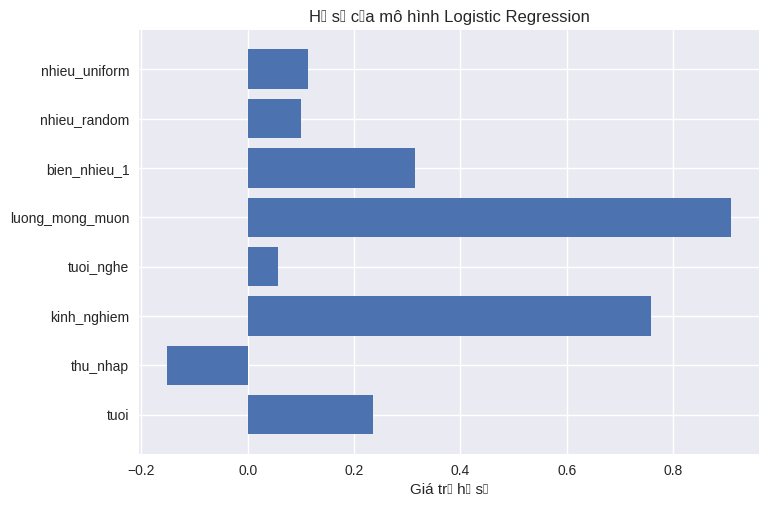

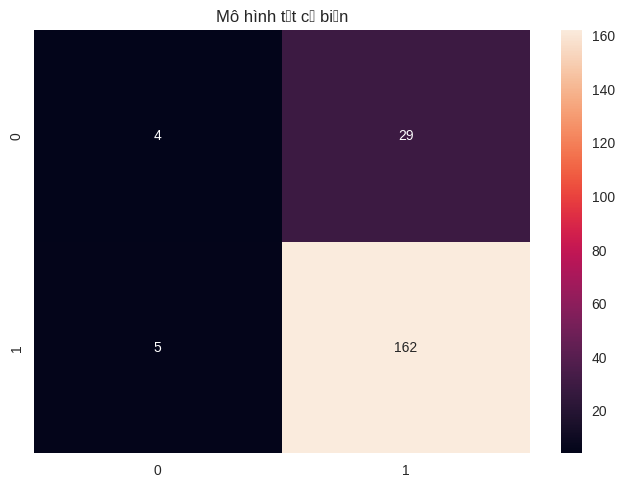

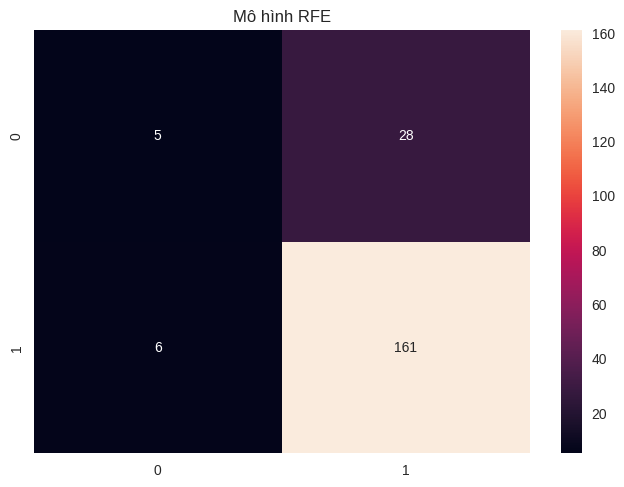

In [ ]:
# =============================================================================
# CÂU HỎI 4: TRỰC QUAN HÓA HỆ SỐ VÀ MA TRẬN NHẦM LẪN (5 điểm)
# =============================================================================
print("\n🎯 CÂU HỎI 4: TRỰC QUAN HÓA HỆ SỐ VÀ MA TRẬN NHẦM LẪN")
print("Hướng dẫn:")
print("- Vẽ biểu đồ hệ số của mô hình (coefficients)")
print("- Tạo và hiển thị ma trận nhầm lẫn")
print("- Sử dụng matplotlib và seaborn")

# TODO: Viết code ở đây

coefficients = pd.DataFrame({'Biến': X.columns, 'Hệ số': log_model_all.coef_[0]})
plt.barh(coefficients['Biến'],coefficients['Hệ số'])
plt.title('Hệ số của mô hình Logistic Regression')
plt.xlabel('Giá trị hệ số')
plt.show()
cm_all = confusion_matrix(y_test,y_pred_all)
sns.heatmap(cm_all,annot=True,fmt='d')
plt.title('Mô hình tất cả biến')
plt.show()

cm_rfe = confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(cm_rfe,annot=True,fmt='d')
plt.title('Mô hình RFE')
plt.show()

"""
Gợi ý:
- coefficients = pd.DataFrame({'Biến': X.columns, 'Hệ số': model_all.coef_[0]})
- plt.barh() để vẽ hệ số
- confusion_matrix() và sns.heatmap() cho ma trận nhầm lẫn
"""
_ = None


🎯 CÂU HỎI 5: VẼ ĐƯỜNG CONG ROC VÀ TÍNH AUC
Hướng dẫn:
- Tính fpr, tpr cho cả hai mô hình
- Vẽ đường cong ROC cho cả hai mô hình trên cùng một biểu đồ
- Tính và hiển thị AUC score


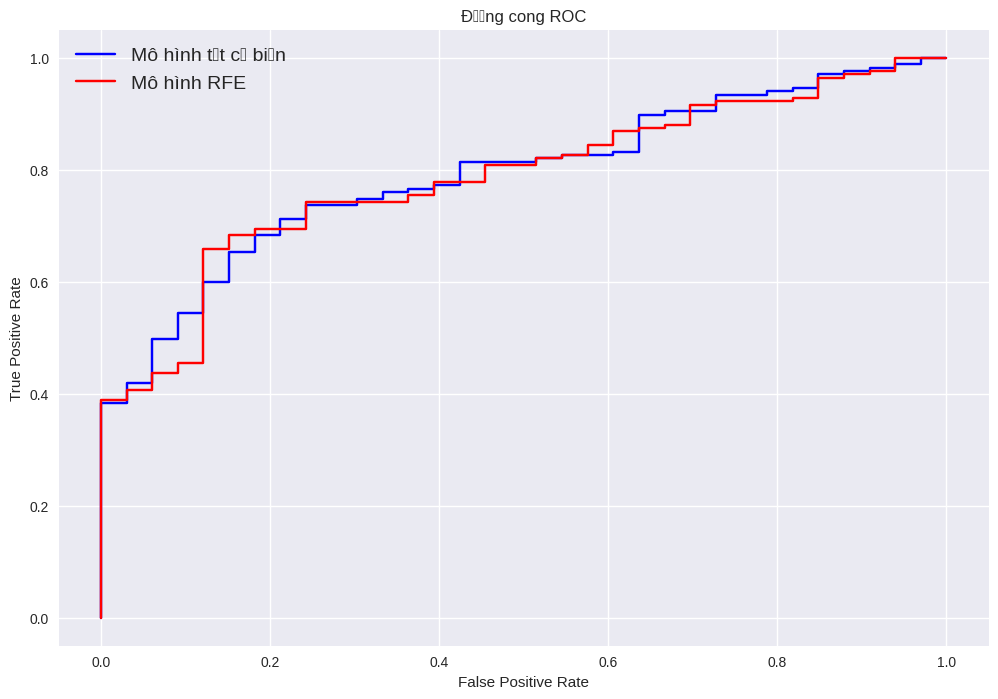

AUC score all: 0.7920522591181274
AUC score rfe: 0.7864271457085829


In [ ]:
# =============================================================================
# CÂU HỎI 5: VẼ ĐƯỜNG CONG ROC VÀ TÍNH AUC (5 điểm)
# =============================================================================
print("\n🎯 CÂU HỎI 5: VẼ ĐƯỜNG CONG ROC VÀ TÍNH AUC")
print("Hướng dẫn:")
print("- Tính fpr, tpr cho cả hai mô hình")
print("- Vẽ đường cong ROC cho cả hai mô hình trên cùng một biểu đồ")
print("- Tính và hiển thị AUC score")

# TODO: Viết code ở đây

fpr_all, tpr_all, thresholds_all = roc_curve(y_test,y_pred_proba_all)
fpr_rfe, tpr_rfe, thresholds_rfe = roc_curve(y_test,y_pred_proba_rfe)

auc_score_all = auc(fpr_all, tpr_all)
auc_score_rfe = auc(fpr_rfe, tpr_rfe)

plt.figure(figsize=(12,8))
plt.plot(fpr_all, tpr_all,color='blue',label='Mô hình tất cả biến')
plt.plot(fpr_rfe, tpr_rfe,color='red',label='Mô hình RFE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()
print(f'AUC score all: {auc_score_all}')
print(f'AUC score rfe: {auc_score_rfe}')
"""
Gợi ý:
- fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
- auc_score = auc(fpr, tpr)
- plt.plot() để vẽ đường cong
"""
_ = None

In [ ]:
# =============================================================================
# CÂU HỎI 6: ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH (5 điểm)
# =============================================================================
print("\n🎯 CÂU HỎI 6: ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH")
print("Hướng dẫn:")
print("- In classification report cho cả hai mô hình")
print("- Tạo bảng so sánh độ chính xác và AUC")
print("- Đưa ra nhận xét về hiệu suất của từng mô hình")

# TODO: Viết code ở đây

print('\nMô hình với tất cả biến\n',classification_report(y_test, y_pred_all, target_names=['Không được tuyển','Được tuyển']))
print('\nMô hình với RFE\n',classification_report(y_test, y_pred_rfe, target_names=['Không được tuyển','Được tuyển']))

table = pd.DataFrame({
    'Mô hình': ['Với tất cả biến','Với RFE'],
    'Accuracy': [accuracy_all,accuracy_rfe],
    'AUC' : [auc_score_all,auc_score_rfe],
})
print('\n',table.to_string(index=False))
print('Qua thử nghiệm với nhiều kỹ thuật chọn biến (RFE, SelectKBest), regularization (L1, L2), và cross-validation, hiệu suất của Logistic Regression ổn định quanh mức ~0.83–0.84. Điều này cho thấy mô hình tuyến tính này đã khai thác tối đa lượng thông tin có thể học được từ dữ liệu hiện tại')


"""
Gợi ý:
- classification_report(y_test, y_pred, target_names=[...])
- accuracy_score() để tính độ chính xác
- So sánh và nhận xét
"""
_ = None


🎯 CÂU HỎI 6: ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH
Hướng dẫn:
- In classification report cho cả hai mô hình
- Tạo bảng so sánh độ chính xác và AUC
- Đưa ra nhận xét về hiệu suất của từng mô hình

Mô hình với tất cả biến
                   precision    recall  f1-score   support

Không được tuyển       0.44      0.12      0.19        33
      Được tuyển       0.85      0.97      0.91       167

        accuracy                           0.83       200
       macro avg       0.65      0.55      0.55       200
    weighted avg       0.78      0.83      0.79       200


Mô hình với RFE
                   precision    recall  f1-score   support

Không được tuyển       0.45      0.15      0.23        33
      Được tuyển       0.85      0.96      0.90       167

        accuracy                           0.83       200
       macro avg       0.65      0.56      0.57       200
    weighted avg       0.79      0.83      0.79       200


         Mô hình  Accuracy      AUC
Với tất cả biến      0.83 0.792

## **Đánh giá**
### Mô hình tất cả biến
1. Cả hai mô hình đều dự đoán rất tốt lớp **Được tuyển** với precision và recall cao (0.85 và 0.97)
2. Tuy nhiên đối với với lớp **Không được tuyển** thì khá tệ (0.44 và 0.12)

  **-> Mô hình không cân bằng tốt giữa 2 lớp**

### Mô hình RFE
1. Hiệu suất rất gần như tương đương mô hình đầy đủ (accuracy và AUC gần như nhau).

2. Với lớp "Không được tuyển", recall cải thiện nhẹ (0.15 so với 0.12), dẫn đến F1-score tăng từ 0.19 → 0.23.

  **->Mô hình đơn giản hơn mà vẫn giữ hiệu suất tương đương, nhưng vẫn mất cân bằng giữa hai lớp**

## **Kết Luận**

* Cả 2 mô hình đều đạt Accuracy và AUC cao, tuy nhiên bị mất cân bằng khi đánh giá lớp **Được tuyển** quá tốt trong khi lớp **Không được tuyển** thì ngược lại.

* Mô hình RFE đơn giản, ít biến hơn nhưng vẫn có hiệu suất tương đương mô hình đầy đủ, thậm chí có phần nhỉnh hơn. Tuy nhiên vấn đề mất cân bằng vẫn còn tồn tại

# **KẾT THÚC PHẦN TRẢ LỜI CỦA BẠN**

In [ ]:
# =============================================================================
# PHẦN KIỂM TRA KẾT QUẢ (CHO SẴN)
# =============================================================================
print("\n" + "="*60)
print("🏆 KIỂM TRA KẾT QUẢ")
print("="*60)

# Dữ liệu để kiểm tra
data.to_csv('du_lieu_logistic_regression.csv', index=False, encoding='utf-8')
print(f"💾 Dữ liệu đã được lưu: 'du_lieu_logistic_regression.csv'")

print("\n📋 CHECKLIST CÁC BƯỚC CẦN HOÀN THÀNH:")
print("☐ Chuẩn bị và chia dữ liệu train/test")
print("☐ Chuẩn hóa dữ liệu với StandardScaler")
print("☐ Xây dựng mô hình với tất cả biến")
print("☐ Lựa chọn biến với RFE")
print("☐ Xây dựng mô hình với biến được chọn")
print("☐ Vẽ biểu đồ hệ số regression")
print("☐ Tạo ma trận nhầm lẫn")
print("☐ Vẽ đường cong ROC và tính AUC")
print("☐ So sánh và đánh giá mô hình")
print("☐ Đưa ra nhận xét và kết luận")

print("\n🎓 TIÊU CHÍ CHẤM ĐIỂM (Tổng: 30 điểm):")
print("- Chuẩn bị dữ liệu: 5 điểm")
print("- Xây dựng mô hình cơ bản: 5 điểm")
print("- Lựa chọn biến với RFE: 5 điểm")
print("- Trực quan hóa kết quả: 5 điểm")
print("- Đánh giá ROC/AUC: 5 điểm")
print("- So sánh và nhận xét: 5 điểm")

print("\n💡 GỢI Ý THÊM:")
print("- Thử nghiệm với các tham số khác của LogisticRegression")
print("- So sánh với các phương pháp feature selection khác")
print("- Áp dụng regularization (L1, L2) để xử lý đa cộng tuyến")
print("- Thử cross-validation để đánh giá mô hình tốt hơn")


🏆 KIỂM TRA KẾT QUẢ
💾 Dữ liệu đã được lưu: 'du_lieu_logistic_regression.csv'

📋 CHECKLIST CÁC BƯỚC CẦN HOÀN THÀNH:
☐ Chuẩn bị và chia dữ liệu train/test
☐ Chuẩn hóa dữ liệu với StandardScaler
☐ Xây dựng mô hình với tất cả biến
☐ Lựa chọn biến với RFE
☐ Xây dựng mô hình với biến được chọn
☐ Vẽ biểu đồ hệ số regression
☐ Tạo ma trận nhầm lẫn
☐ Vẽ đường cong ROC và tính AUC
☐ So sánh và đánh giá mô hình
☐ Đưa ra nhận xét và kết luận

🎓 TIÊU CHÍ CHẤM ĐIỂM (Tổng: 30 điểm):
- Chuẩn bị dữ liệu: 5 điểm
- Xây dựng mô hình cơ bản: 5 điểm
- Lựa chọn biến với RFE: 5 điểm
- Trực quan hóa kết quả: 5 điểm
- Đánh giá ROC/AUC: 5 điểm
- So sánh và nhận xét: 5 điểm

💡 GỢI Ý THÊM:
- Thử nghiệm với các tham số khác của LogisticRegression
- So sánh với các phương pháp feature selection khác
- Áp dụng regularization (L1, L2) để xử lý đa cộng tuyến
- Thử cross-validation để đánh giá mô hình tốt hơn
